# A mchine learning project on **Heart Diseases**

## This is my **3rd semester** final machine learning project on _Heart Disease classification_

Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


### Attributes
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
  number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
data = pd.read_csv(r'/kaggle/input/heart-disease-dataset/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.shape

(1025, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Define a function to detect outliers using the z-score method
def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers in a pandas dataframe using the z-score method.
    """
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Apply the outlier detection function to the age column
outliers_age = detect_outliers_zscore(data['age'])

# Print the number of outliers detected
print(f"Number of age outliers: {outliers_age.sum()}")


Number of age outliers: 0


In [7]:
import matplotlib.pyplot as plt

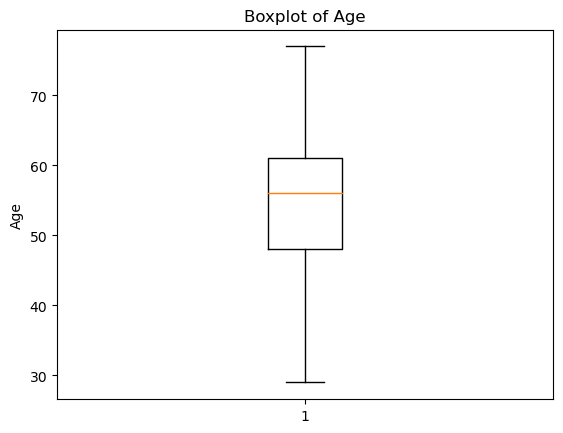

In [8]:
# Create a boxplot of the "Age" column
plt.boxplot(data['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [9]:
# Apply the outlier detection function to the age column
outliers_chol = detect_outliers_zscore(data['chol'])

# Print the number of outliers detected
print(f"Number of age outliers: {outliers_chol.sum()}")

Number of age outliers: 13


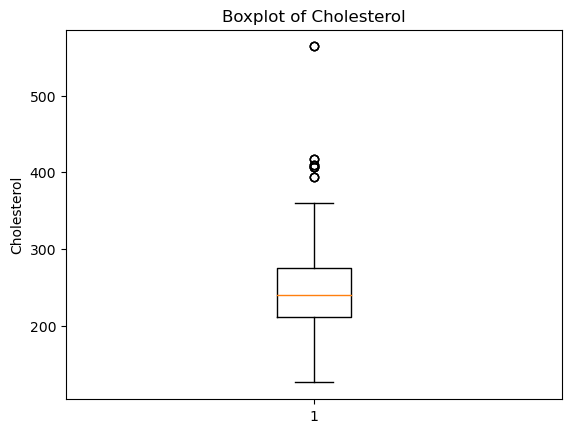

In [10]:
# Create a boxplot of the "Age" column
plt.boxplot(data['chol'])
plt.title('Boxplot of Cholesterol')
plt.ylabel('Cholesterol')
plt.show()

In [11]:
# Apply the outlier detection function to the age column
outliers_restbp = detect_outliers_zscore(data['trestbps'])

# Print the number of outliers detected
print(f"Number of age outliers: {outliers_restbp.sum()}")

Number of age outliers: 7


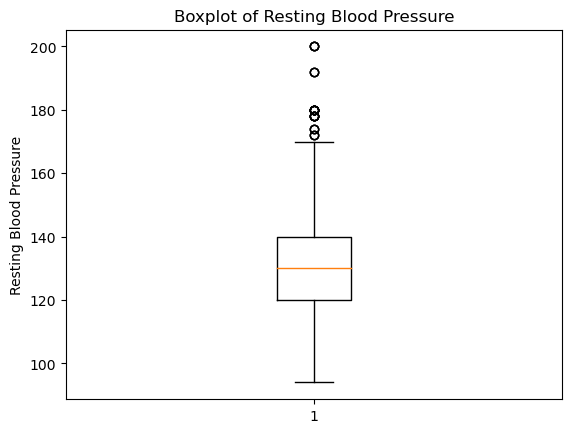

In [12]:
# Create a boxplot of the "resting BP" column
plt.boxplot(data['trestbps'])
plt.title('Boxplot of Resting Blood Pressure')
plt.ylabel('Resting Blood Pressure')
plt.show()